In [38]:
import sklearn.metrics

sklearn.metrics.roc_auc_score(
    [ 1, -1, -1, 1, -1 ],
    [ 0.7, 0.6, 0.3, 0.45, 0.92 ]
)

0.5

In [39]:
hr = 0.6 * 0.4 * 2
hrl = (50/70) * (20/70) * 2
hrr = (10/30) * (20/30) * 2

hr - (70/100) * hrl - (30/100) * hrr

0.06095238095238095

In [40]:
import numpy
a = numpy.array([ 1, 1, 1 ])
b = numpy.array([ 1, 2, 0 ])

def skal(x1, x2):
    return numpy.exp(-1 * (numpy.linalg.norm(x1 - x2) ** 2))

skal(a, b) / numpy.sqrt(skal(a, a) * skal(b, b))

0.13533528323661262

In [41]:
import pandas
df_train = pandas.read_csv("TrainData.csv")
df_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target
0,1,34.750000,15.00,2,12,7,5.375,A,1,9,1,2,0,135.0,Churn
1,1,19.170000,4.00,1,3,4,1.000,B,0,0,1,2,360,1001.0,Not churn
2,1,20.250000,9.96,2,10,2,0.000,A,0,0,0,2,0,1.0,Churn
3,1,NaN,28.00,1,8,4,28.500,A,1,40,0,2,0,16.0,Churn
4,1,22.580000,1.50,1,6,4,0.540,B,0,0,1,2,120,68.0,Not churn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,0,37.330000,2.50,2,3,8,0.210,B,0,0,0,2,260,247.0,Not churn
509,0,24.750000,3.00,2,11,8,1.835,A,1,19,0,2,0,501.0,Churn
510,1,31.315675,8.50,2,10,8,7.000,A,1,3,0,2,0,1.0,Churn
511,1,31.315675,3.00,2,11,8,6.000,A,1,11,0,2,80,1.0,Churn


In [42]:
df_test = pandas.read_csv("TestData.csv")
df_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,32.08,4.000,1,13,4,1.500,B,0,0,1,2,120,1
1,0,23.50,1.500,2,9,4,0.875,B,0,0,1,2,160,1
2,0,33.25,2.500,1,8,4,2.500,B,0,0,1,2,0,3
3,1,74.83,19.000,1,1,1,0.040,B,1,2,0,2,0,352
4,1,20.17,5.625,2,9,4,1.710,A,0,0,0,1,120,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,1,32.67,5.500,2,11,8,5.500,A,1,12,1,2,408,1001
169,1,65.42,11.000,2,10,9,20.000,A,1,7,1,2,22,1
170,0,27.33,1.665,2,1,1,0.000,B,0,0,0,2,340,2
171,1,24.83,2.750,2,8,4,2.250,A,1,6,0,2,184,601


In [43]:
df_train.isna().sum()

0         0
1         5
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        3
target    0
dtype: int64

In [44]:
df_train["1"].mean(skipna = True)

31.28322514908239

In [45]:
df_train["1"] = df_train["1"].fillna(df_train["1"].mean(skipna = True))

In [46]:
df_train.isna().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        3
target    0
dtype: int64

In [47]:
df_train[df_train["13"].isna()]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target
347,0,33.75,0.750,2,4,5,1.000,A,1,3,1,2,212,NaN,Not churn
364,0,15.83,7.625,2,11,4,0.125,B,1,1,1,2,0,NaN,Not churn
381,1,28.25,5.125,2,14,4,4.750,A,1,2,0,2,420,NaN,Churn


In [48]:
df_train = df_train.drop([ 347, 364, 381 ], axis = 0)
df_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target
0,1,34.750000,15.00,2,12,7,5.375,A,1,9,1,2,0,135.0,Churn
1,1,19.170000,4.00,1,3,4,1.000,B,0,0,1,2,360,1001.0,Not churn
2,1,20.250000,9.96,2,10,2,0.000,A,0,0,0,2,0,1.0,Churn
3,1,31.283225,28.00,1,8,4,28.500,A,1,40,0,2,0,16.0,Churn
4,1,22.580000,1.50,1,6,4,0.540,B,0,0,1,2,120,68.0,Not churn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,0,37.330000,2.50,2,3,8,0.210,B,0,0,0,2,260,247.0,Not churn
509,0,24.750000,3.00,2,11,8,1.835,A,1,19,0,2,0,501.0,Churn
510,1,31.315675,8.50,2,10,8,7.000,A,1,3,0,2,0,1.0,Churn
511,1,31.315675,3.00,2,11,8,6.000,A,1,11,0,2,80,1.0,Churn


In [49]:
numpy.unique(df_train["target"], return_counts = True)

(array(['Chorn', 'Churn', 'Not chorn', 'Not churn'], dtype=object),
 array([  1, 232,   1, 276], dtype=int64))

In [50]:
df_train["target"] = (df_train["target"] == 'Chorn') | (df_train["target"] == 'Churn')

In [51]:
numpy.unique(df_train["target"], return_counts = True)

(array([False,  True]), array([277, 233], dtype=int64))

In [52]:
cou = 0
for column in df_train:
    if column == 'target':
        continue
    print(column, len(numpy.unique(df_train[column])))
    if len(numpy.unique(df_train[column])) < 5:
        cou += 1
cou

0 2
1 289
2 184
3 3
4 14
5 8
6 120
7 2
8 2
9 22
10 2
11 3
12 140
13 188


6

In [53]:
df_train["target"] = df_train["target"] * 1

In [54]:
copy = df_train[["7", "target"]].copy()
copy["7"] = (copy["7"] == 'A') * 1
copy.corr()

,7,target
7,1.000000,0.714724
target,0.714724,1.000000


In [55]:
((df_train["7"] == "A") - df_train["target"]).sum()

44

In [56]:
df_train["2"].mean()

4.994931372549019

In [57]:
df_train["13"].median()

5.0

In [58]:
task22 = df_train[
    (df_train["2"] > df_train["2"].mean()) &
    (df_train["13"] < df_train["13"].median()) &
    (df_train["target"] == 1)
]
task22.shape

(45, 15)

In [59]:
df_train[df_train["target"] == 1].shape

(233, 15)

In [60]:
45 / 233

0.19313304721030042

In [61]:
numpy.unique(df_train["7"])

array(['A', 'B'], dtype=object)

In [62]:
df_train["7"] = (df_train["7"] == 'A') * 1
df_test["7"] = (df_test["7"] == 'A') * 1

In [63]:
df_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,32.08,4.000,1,13,4,1.500,1,0,0,1,2,120,1
1,0,23.50,1.500,2,9,4,0.875,1,0,0,1,2,160,1
2,0,33.25,2.500,1,8,4,2.500,1,0,0,1,2,0,3
3,1,74.83,19.000,1,1,1,0.040,1,1,2,0,2,0,352
4,1,20.17,5.625,2,9,4,1.710,0,0,0,0,1,120,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,1,32.67,5.500,2,11,8,5.500,0,1,12,1,2,408,1001
169,1,65.42,11.000,2,10,9,20.000,0,1,7,1,2,22,1
170,0,27.33,1.665,2,1,1,0.000,1,0,0,0,2,340,2
171,1,24.83,2.750,2,8,4,2.250,0,1,6,0,2,184,601


In [64]:
df_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target
0,1,34.750000,15.00,2,12,7,5.375,0,1,9,1,2,0,135.0,1
1,1,19.170000,4.00,1,3,4,1.000,1,0,0,1,2,360,1001.0,0
2,1,20.250000,9.96,2,10,2,0.000,0,0,0,0,2,0,1.0,1
3,1,31.283225,28.00,1,8,4,28.500,0,1,40,0,2,0,16.0,1
4,1,22.580000,1.50,1,6,4,0.540,1,0,0,1,2,120,68.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,0,37.330000,2.50,2,3,8,0.210,1,0,0,0,2,260,247.0,0
509,0,24.750000,3.00,2,11,8,1.835,0,1,19,0,2,0,501.0,1
510,1,31.315675,8.50,2,10,8,7.000,0,1,3,0,2,0,1.0,1
511,1,31.315675,3.00,2,11,8,6.000,0,1,11,0,2,80,1.0,1


In [65]:
train_y = df_train["target"]
train_X = df_train.drop('target', axis = 1).to_numpy()

In [66]:
train_X.shape

(510, 14)

In [67]:
import sklearn.linear_model
import sklearn.metrics
import sklearn.model_selection

model = sklearn.linear_model.LogisticRegression(
    random_state = 42,
    penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,
    class_weight=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0,
    warm_start=False, n_jobs=None, l1_ratio=None
)

res = sklearn.model_selection.cross_validate(
    estimator = model,
    X = train_X,
    y = train_y.to_numpy(),
    scoring = "f1",
    cv = sklearn.model_selection.KFold(n_splits = 3)
)
res
res['test_score'].mean()

d:\Programs\Programming\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Programs\Programming\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

0.8029855260845219

In [68]:
res['test_score'].mean()

0.8029855260845219

In [69]:
numpy.log10(0.001)

-3.0

In [70]:
numpy.log10(100 )

2.0

In [71]:
numpy.log10([ 0.001, 0.01, 0.1, 0, 10, 100 ])

C:\Users\TTPO100AJIEX\AppData\Local\Temp\ipykernel_16736\3520792113.py:1: RuntimeWarning: divide by zero encountered in log10
  numpy.log10([ 0.001, 0.01, 0.1, 0, 10, 100 ])


array([ -3.,  -2.,  -1., -inf,   1.,   2.])

In [72]:
model = sklearn.linear_model.LogisticRegression(
    random_state = 42,
    penalty='l2', dual=False, tol=0.0001, fit_intercept=True, intercept_scaling=1, class_weight=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None
)

res = sklearn.model_selection.GridSearchCV(
    estimator = model,
    param_grid = {
        'C': [ 0.001, 0.01, 0.1, 10, 100 ]
    },
    scoring = "f1",
    cv = 3
).fit(train_X, train_y).cv_results_

d:\Programs\Programming\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Programs\Programming\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

In [73]:
res

{'mean_fit_time': array([0.00966636, 0.00966644, 0.00933401, 0.0113337 , 0.01033195]),
 'std_fit_time': array([0.0009433 , 0.00047188, 0.00094336, 0.00205508, 0.00124481]),
 'mean_score_time': array([0.00033339, 0.0010004 , 0.00033323, 0.00100144, 0.        ]),
 'std_score_time': array([4.71482745e-04, 3.37174788e-07, 4.71257962e-04, 1.18944085e-06,
        0.00000000e+00]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 10, 100],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 10}, {'C': 100}],
 'split0_test_score': array([0.704     , 0.75912409, 0.77697842, 0.76811594, 0.77142857]),
 'split1_test_score': array([0.76119403, 0.78873239, 0.84      , 0.80769231, 0.83870968]),
 'split2_test_score': array([0.68085106, 0.73333333, 0.75496689, 0.84146341, 0.81987578]),
 'mean_test_score': array([0.71534836, 0.76039661, 0.79064843, 0.80575722, 0.81000468]),
 'std_test_score':

In [74]:
res['params'][res["mean_test_score"].argmax()]

{'C': 100}

In [286]:
df_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target
0,1,34.750000,15.00,2,12,7,5.375,1,1,9,1,2,0,135.0,1
1,1,19.170000,4.00,1,3,4,1.000,0,0,0,1,2,360,1001.0,0
2,1,20.250000,9.96,2,10,2,0.000,1,0,0,0,2,0,1.0,1
3,1,31.283225,28.00,1,8,4,28.500,1,1,40,0,2,0,16.0,1
4,1,22.580000,1.50,1,6,4,0.540,0,0,0,1,2,120,68.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,0,37.330000,2.50,2,3,8,0.210,0,0,0,0,2,260,247.0,0
509,0,24.750000,3.00,2,11,8,1.835,1,1,19,0,2,0,501.0,1
510,1,31.315675,8.50,2,10,8,7.000,1,1,3,0,2,0,1.0,1
511,1,31.315675,3.00,2,11,8,6.000,1,1,11,0,2,80,1.0,1


In [287]:
df_train26 = df_train.copy()
df_train26['14'] = df_train26['7'] * df_train26['11']
df_train26

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target,14
0,1,34.750000,15.00,2,12,7,5.375,1,1,9,1,2,0,135.0,1,2
1,1,19.170000,4.00,1,3,4,1.000,0,0,0,1,2,360,1001.0,0,0
2,1,20.250000,9.96,2,10,2,0.000,1,0,0,0,2,0,1.0,1,2
3,1,31.283225,28.00,1,8,4,28.500,1,1,40,0,2,0,16.0,1,2
4,1,22.580000,1.50,1,6,4,0.540,0,0,0,1,2,120,68.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,0,37.330000,2.50,2,3,8,0.210,0,0,0,0,2,260,247.0,0,0
509,0,24.750000,3.00,2,11,8,1.835,1,1,19,0,2,0,501.0,1,2
510,1,31.315675,8.50,2,10,8,7.000,1,1,3,0,2,0,1.0,1,2
511,1,31.315675,3.00,2,11,8,6.000,1,1,11,0,2,80,1.0,1,2


In [288]:
df_test26 = df_test.copy()
df_test26['14'] = df_test26['7'] * df_test26['11']
df_test26

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,32.08,4.000,1,13,4,1.500,0,0,0,1,2,120,1,0
1,0,23.50,1.500,2,9,4,0.875,0,0,0,1,2,160,1,0
2,0,33.25,2.500,1,8,4,2.500,0,0,0,1,2,0,3,0
3,1,74.83,19.000,1,1,1,0.040,0,1,2,0,2,0,352,0
4,1,20.17,5.625,2,9,4,1.710,1,0,0,0,1,120,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,1,32.67,5.500,2,11,8,5.500,1,1,12,1,2,408,1001,2
169,1,65.42,11.000,2,10,9,20.000,1,1,7,1,2,22,1,2
170,0,27.33,1.665,2,1,1,0.000,0,0,0,0,2,340,2,0
171,1,24.83,2.750,2,8,4,2.250,1,1,6,0,2,184,601,2


In [289]:
train_y26 = df_train26["target"]
train_X26 = df_train26.drop('target', axis = 1).to_numpy()
train_X26.shape

(510, 15)

In [290]:
model = sklearn.linear_model.LogisticRegression(
    random_state = 42,
penalty='l2', dual=False, tol=0.0001, fit_intercept=True, intercept_scaling=1, class_weight=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

res = sklearn.model_selection.GridSearchCV(
    estimator = model,
    param_grid = {
        'C': [ 0.001, 0.01, 0.1, 10, 100 ]
    },
    scoring = "f1",
    cv = sklearn.model_selection.KFold(3)
).fit(train_X26, train_y26).cv_results_

d:\Programs\Programming\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Programs\Programming\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

In [291]:
res

{'mean_fit_time': array([0.01432204, 0.00966024, 0.00966644, 0.0100445 , 0.00966962]),
 'std_fit_time': array([0.00412283, 0.00093229, 0.00047053, 0.00090212, 0.00047379]),
 'mean_score_time': array([0.00066543, 0.00066678, 0.00033291, 0.        , 0.00066384]),
 'std_score_time': array([0.00047053, 0.00047149, 0.00047081, 0.        , 0.0004694 ]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 10, 100],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 10}, {'C': 100}],
 'split0_test_score': array([0.67692308, 0.81818182, 0.86111111, 0.7972028 , 0.81428571]),
 'split1_test_score': array([0.75362319, 0.81290323, 0.84146341, 0.85207101, 0.85207101]),
 'split2_test_score': array([0.7260274 , 0.8       , 0.87116564, 0.88484848, 0.87951807]),
 'mean_test_score': array([0.71885789, 0.81036168, 0.85791339, 0.84470743, 0.84862493]),
 'std_test_score': array([0.03172043, 0.007637

In [292]:
res['mean_test_score']

array([0.71885789, 0.81036168, 0.85791339, 0.84470743, 0.84862493])

In [293]:
res['params'][res['mean_test_score'].argmax()]

{'C': 0.1}

In [294]:
test_X = df_test.to_numpy()
test_X.shape

(173, 14)

In [295]:
model = sklearn.linear_model.LogisticRegression(
    random_state = 42,
    C = 100,
    penalty='l2', dual=False, tol=0.0001, fit_intercept=True, intercept_scaling=1, 
    class_weight=None, solver='lbfgs', max_iter=100, multi_class='auto',
    verbose=0, warm_start=False, n_jobs=None, l1_ratio=None
)
prediction = model.fit(train_X, train_y).predict(test_X)
pandas.DataFrame(prediction, columns = [ 'target' ]).to_csv('result.csv', index = False)

d:\Programs\Programming\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [296]:
test_X26 = df_test26.to_numpy()
test_X26.shape

(173, 15)

In [297]:
model = sklearn.linear_model.LogisticRegression(
    random_state = 42,
    C = 0.1,
    penalty='l2', dual=False, tol=0.0001, fit_intercept=True, intercept_scaling=1, 
    class_weight=None, solver='lbfgs', max_iter=100, multi_class='auto',
    verbose=0, warm_start=False, n_jobs=None, l1_ratio=None
)
prediction = model.fit(train_X26, train_y26).predict(test_X26)
pandas.DataFrame(prediction, columns = [ 'target' ]).to_csv('result.csv', index = False)

d:\Programs\Programming\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [298]:
train_X 

array([[1.00000000e+00, 3.47500000e+01, 1.50000000e+01, ...,
        2.00000000e+00, 0.00000000e+00, 1.35000000e+02],
       [1.00000000e+00, 1.91700000e+01, 4.00000000e+00, ...,
        2.00000000e+00, 3.60000000e+02, 1.00100000e+03],
       [1.00000000e+00, 2.02500000e+01, 9.96000000e+00, ...,
        2.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.00000000e+00, 3.13156751e+01, 8.50000000e+00, ...,
        2.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.13156751e+01, 3.00000000e+00, ...,
        2.00000000e+00, 8.00000000e+01, 1.00000000e+00],
       [0.00000000e+00, 2.69200000e+01, 1.35000000e+01, ...,
        2.00000000e+00, 0.00000000e+00, 5.00100000e+03]])

In [299]:
train_y

0      1
1      0
2      1
3      1
4      0
      ..
508    0
509    1
510    1
511    1
512    1
Name: target, Length: 510, dtype: int32

In [300]:
train_y = train_y.to_numpy()
save_X = train_X
save_y = train_y

In [302]:
import sklearn.metrics
import sklearn.model_selection

numpy.random.seed(42)

train_x, val_x, train_y, val_y = sklearn.model_selection.train_test_split(
    save_X, save_y, test_size = 0.25
)
print(train_x.shape)
print(train_y.shape)
print(val_x.shape)
print(val_y.shape)

import torch
import torch.utils.data

torch.manual_seed(42)

train_ds = torch.utils.data.TensorDataset(torch.tensor(train_x, dtype=torch.float),
                                          torch.tensor(train_y, dtype=torch.float).reshape(-1, 1))
val_ds = torch.utils.data.TensorDataset(torch.tensor(val_x, dtype=torch.float),
                                         torch.tensor(val_y, dtype=torch.float).reshape(-1, 1))


train_dl = torch.utils.data.DataLoader(train_ds, batch_size = 64, shuffle = True)
val_dl = torch.utils.data.DataLoader(val_ds, batch_size = len(val_ds))

(382, 14)
(382,)
(128, 14)
(128,)


In [319]:
train_x.shape[1]

14

610 0.890625
0.890625
0.0


C:\Users\TTPO100AJIEX\AppData\Local\Temp\ipykernel_8340\4171520221.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  final_x = torch.tensor(torch.tensor(test_X), dtype = torch.float)


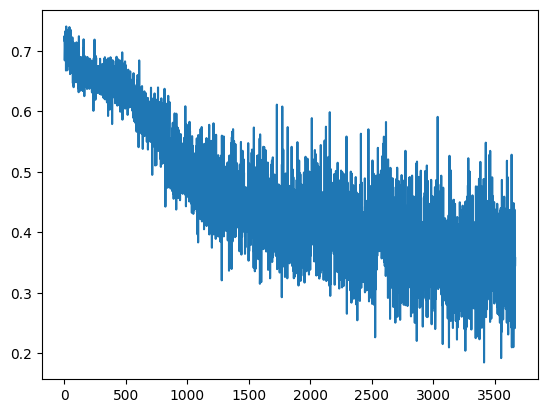

In [345]:
import matplotlib.pyplot as plt

def best_threshold(true, pred):
    best_acc = 0
    ans = 0
    for i in range(0, 100):
        acc = sklearn.metrics.accuracy_score(batch_y, pred > (i / 100))
        if acc > best_acc:
            best_acc = acc
            ans = i
    return ans / 100


torch.manual_seed(42)

model = torch.nn.Sequential(
    torch.nn.Linear(train_x.shape[1], 5), torch.nn.BatchNorm1d(5), torch.nn.GELU(),
    torch.nn.Dropout(0.1), torch.nn.Linear(5, 1)
)

optimizer = torch.optim.AdamW(
    params = model.parameters(),
    lr = 3e-4
)

history = []
for _ in range(611):
    for batch_x, batch_y in train_dl:
        model.train()
        pred = model(batch_x)
        loss = torch.nn.functional.binary_cross_entropy_with_logits(pred, batch_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        history.append(loss.item())

    with torch.no_grad():
        model.eval()
        batch_x, batch_y = next(iter(val_dl))
        pred = model(batch_x)
        # print(torch.nn.functional.cross_entropy(pred, batch_y))
        threshold = best_threshold(batch_y , pred)
        acc = sklearn.metrics.accuracy_score(batch_y, pred > threshold)
        if acc > 0.875:
            print(_, acc)


print(acc)
print(threshold)
final_x = torch.tensor(torch.tensor(test_X), dtype = torch.float)
pred = (model(final_x) > threshold) * 1
pandas.DataFrame(pred, columns = [ 'target' ]).to_csv('result.csv', index = False)
plt.plot(history)

![Alternative Text][1717866374921]

[1717866374921]: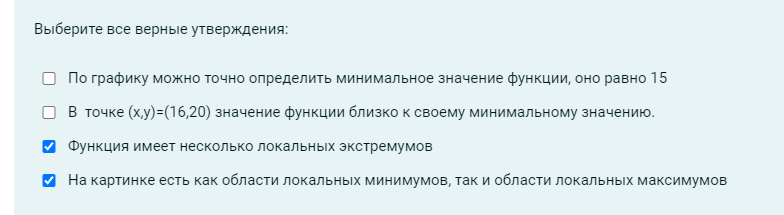

![Alternative Text][1717866383988]

[1717866383988]: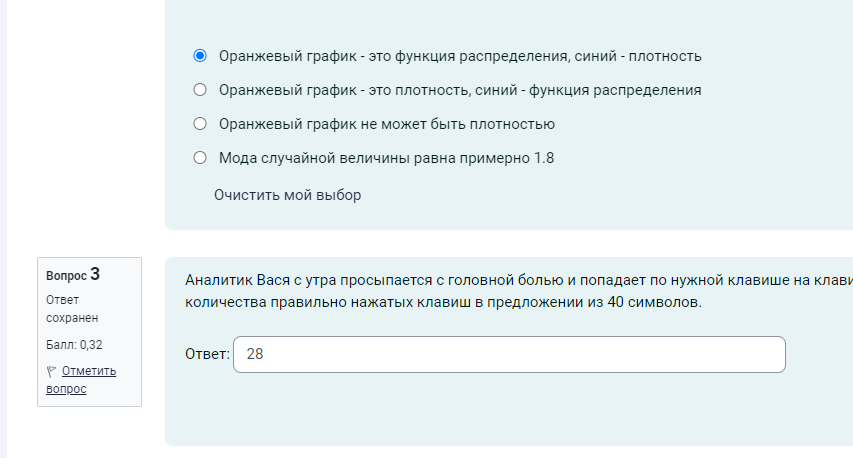

![Alternative Text][1717866390727]

[1717866390727]: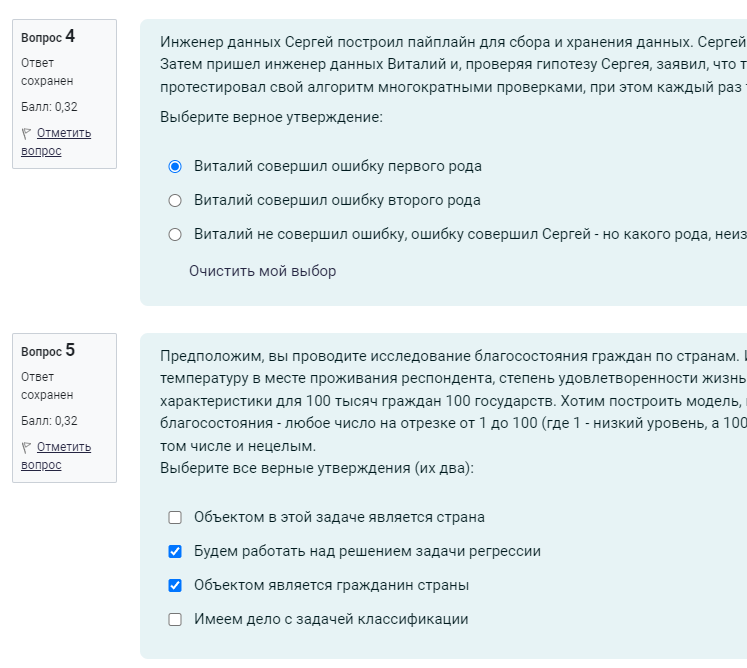

![Alternative Text][1717866401606]

[1717866401606]: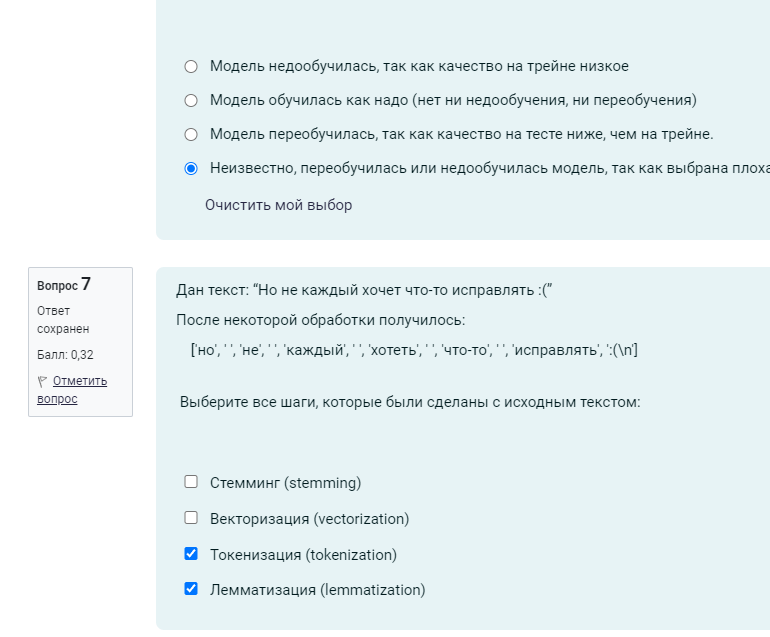

![Alternative Text][1717866408348]

[1717866408348]: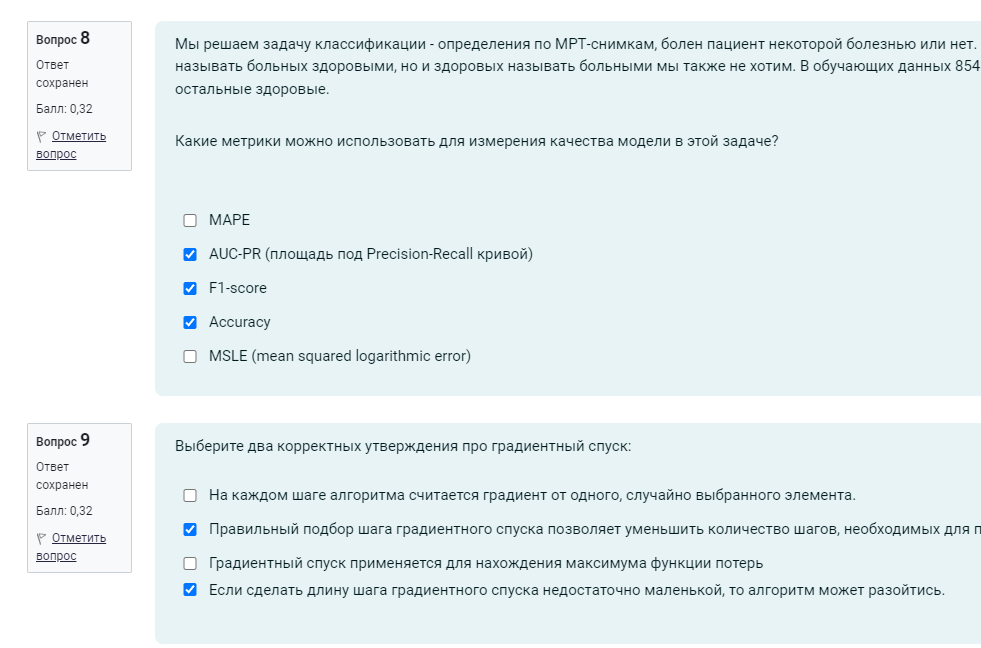

![Alternative Text][1717866415004]

[1717866415004]: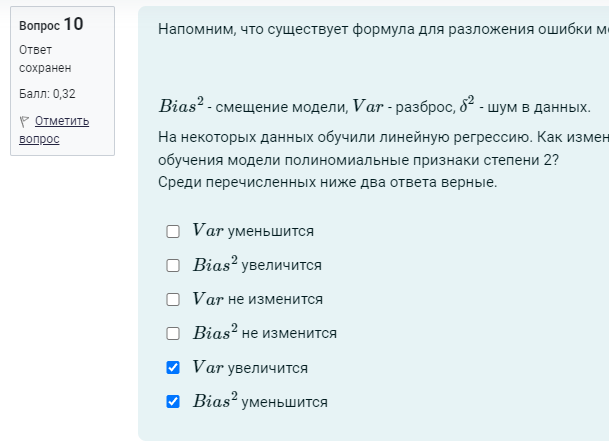

![Alternative Text][1717866421279]

[1717866421279]: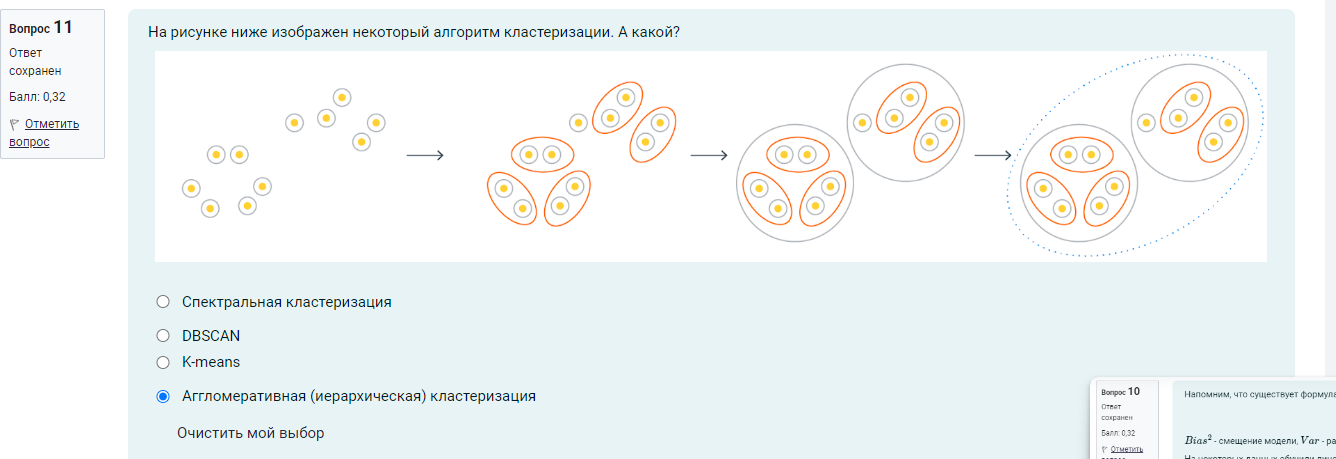

0.5 \
0.06 \
0.14 \
0.01

2 \
31.3 \
3 \
2 \
6 \
нет \
0.19 \
14 \
0.78 \
100 \
0.86 